In [3]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [4]:
# Загрузим данные
file_path = '/Users/albisha/Desktop/titanic.csv'  # Укажите путь к вашему файлу
titanic_data = pd.read_csv(file_path)

In [6]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Дети', 'Подростки', 'Молодые', 'Средний возраст', 'Пожилые']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)

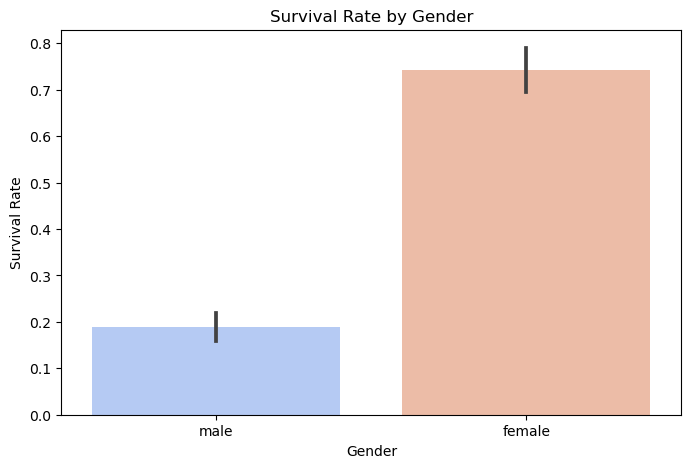

In [8]:
# 3. Визуализация: Survival Rate by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


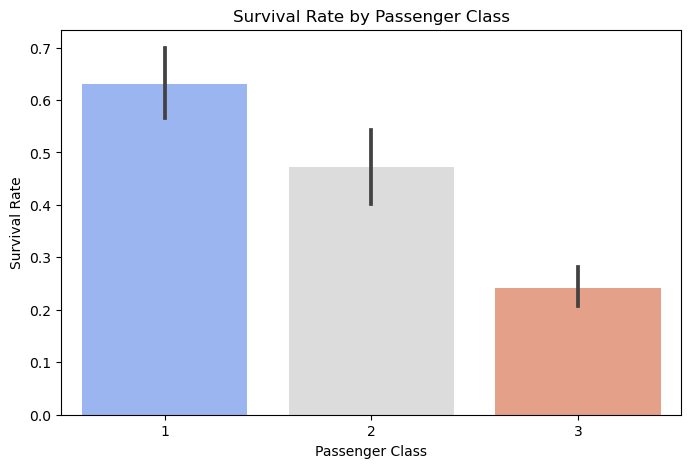

In [9]:
# 4. Визуализация: Survival Rate by Passenger Class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


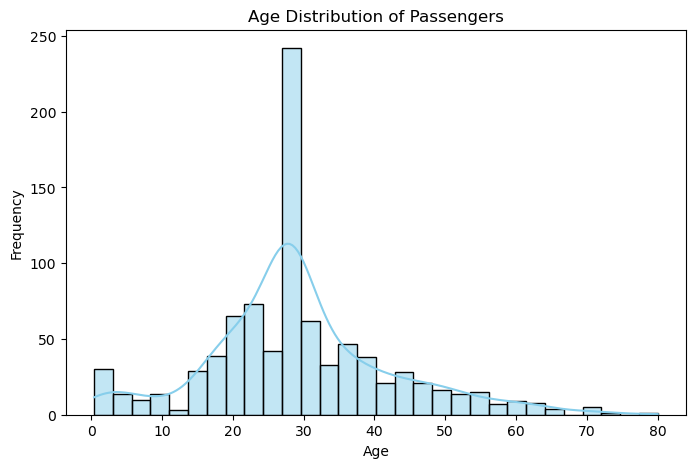

In [10]:
# 5. Визуализация: Age Distribution with Age Groups
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

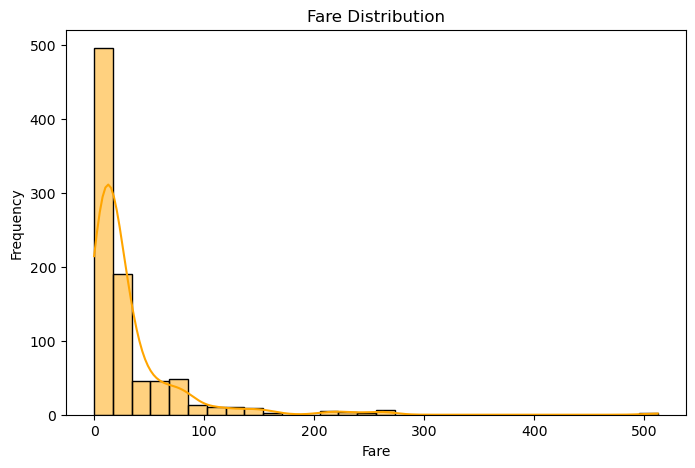

In [11]:
# 6. Визуализация: Fare Distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data['Fare'], kde=True, bins=30, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

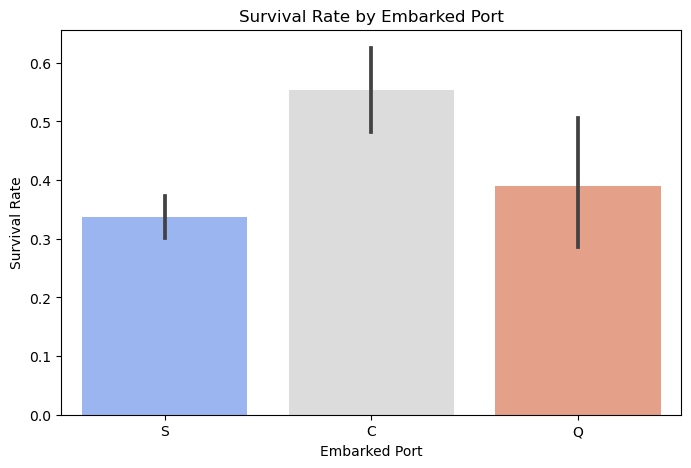

In [12]:
# 7. Визуализация: Survival Rate by Embarked Port
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=titanic_data, palette='coolwarm')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

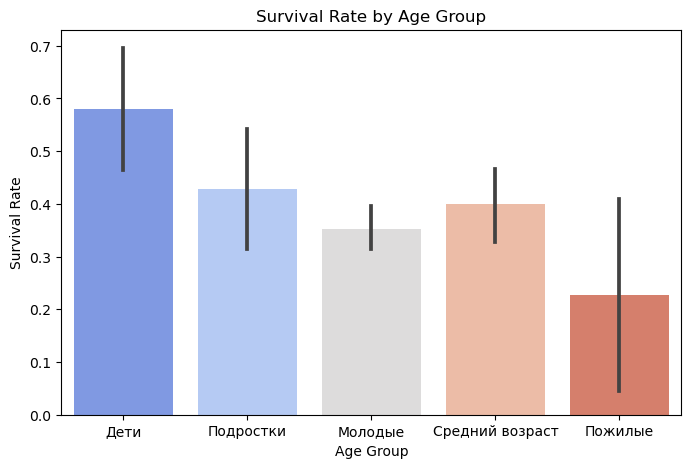

In [13]:

# 8. Визуализация: Survival Rate by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=titanic_data, palette='coolwarm')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [16]:
# 9. Статистический анализ: Корреляция между переменными
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [15]:
# 10. Машинное обучение: Построение модели для предсказания выживаемости
# Преобразуем категориальные переменные в числовые
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True)

# Заполним пропуски в данных
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())

# Разделим данные на признаки и целевую переменную
X = titanic_data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построим модель Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8022
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

